<a href="https://colab.research.google.com/github/audrey-siqueira/Data-Science-Projects/blob/master/Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction using Random Forest Regression**
---
<p align="justify">
 A specific company has an internal salary policy according to the position and hierarchy of each employee. For example, when an employee enters the company, he will first enter the level of business analyst, then he will become a junior consultant, senior consultant, etc. Level 10 is the highest in the hierarchy and represents the position of CEO of the company with the highest salary respectively. For each level the company pays a respective salary predetermined in the company's policies.

 
<p align=center>
<img src="https://drive.google.com/uc?id=1mVYTXFnSftZL_ZtI57MLIidCFYapLNwJ" width="50%"></p>

<p align="justify">
The company contacted a candidate for a new job due to its excellent work experience and curriculum. Through interviews with the HR department, this candidate said that he had been working for 2 years in the position of Regent Manager in his previous job and his salary expectation for the new job would be at least equal to his previous job, something equivalent to $160k a year.

<p align="justify">
First the company wants to know if the position that he worked in his previous job really corresponds to a salary of $160k or if the candidate was bluffing to get a higher salary.

<p align="justify">
Through internet research on sites such as Glassdoor and Lovemondays, the HR department found out how much the candidate's previous company paid for different positions annually and according to this history the company wants to know if Regent Manager's position really would correspond to $160k a year.

<p align="justify">
According to the record, the position of Regent Manager corresponds to level 6, however, as the candidate said he had been working for 2 years in this position, the HR department decided to do the calculations and projections considering level 6.5 instead of 6.

<p align="justify">
The historical data that is important for the HR department are:

<p align="justify">
-The level in the hierarchy ranging from 1 to 10.
<p align="justify">
-The salary corresponding to each level.

<p align=center>
<img src="https://drive.google.com/uc?id=1q5wgaLnWA4wpN7QlXarIDZTgqOMTiyZH" width="50%"></p>

<p align=center>
<img src="https://drive.google.com/uc?id=1ntReGKS2k2ZTQnPz3cR-DZL-59mv5T8K" width="60%"></p>

Then the HR department of the company decided to make a regression with the numbers got in the internet research. They decided to make a **random forest regression**.


As the company database is small and has only 10 levels, all data were considered as a Training set, not considering any data for the Test set and already applying the projection to level 6.5 directly. Then it is possible to verify the salary projections using the **random forest regression**.


**Code description is explained below:**

## **Importing the libraries**


The 3 libraries needed for the project are imported.
- Pandas for data manipulation and analysis
- Numpy for mathematical operations
- Matplotlib for graphical visualizations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the data set**


The .csv file containing his previous company's database is imported.

Separating **Level** as the corresponding X-axis values and the **Salary** as Y-axis values, it was obtained final data set..

The values of the database header and how they are distributed can be viewed in the image below:

In [ ]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/6-Random Forest Regression/Position_Salaries.csv')
X= dataset.iloc[:,1:2].values
Y= dataset.iloc[:,2].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## **Fitting the Random Forest model to dataset**


The **sklearn.ensemble** library was used to apply the **Random Forest Regression** method.

Using the Training set of X and Y values, a prediction curve is created.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X,Y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## **Visualising the Random Forest Results (Higher Resolution and smoother curve)**


A graph was plotted with the real values of **X-axis values VERSUS Y-axis values** (red dots), present in the **Training set**. From these previously mentioned values, the model generated a prediction curve (blue line).


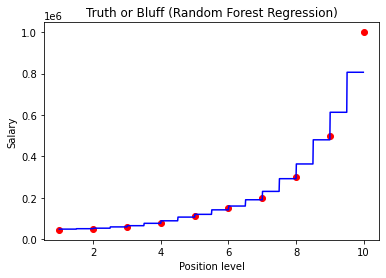

In [ ]:
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



## **Predicting a new result with Random Forest Regression**


The requested value **Level=6.5** is projected using the Random Forest Regression, giving an output as salary..

In [ ]:
regressor.predict([[6.5]])

array([160333.33333333])

## **Conclusion**

<p align="justify">
The Random Forest model got a forecast around $160k, suggesting that the candidate is not bluffing.
